In [2]:
# for data transformation
import numpy as np
# for visualizing the data
import matplotlib.pyplot as plt
# for opening the media file
import scipy.io.wavfile as wavfile

In [3]:
Fs1, aud1 = wavfile.read('record0.wav')
# select left channel only
aud_left = aud1[:,0]
# select right channel only
aud_right = aud1[:,1]
# trim the first 125 seconds
first_left = aud1[:int(Fs1*100)]
first_right = aud1[:int(Fs1*100)]

C:\Users\denis.rosset\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\axes\_axes.py:7773: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


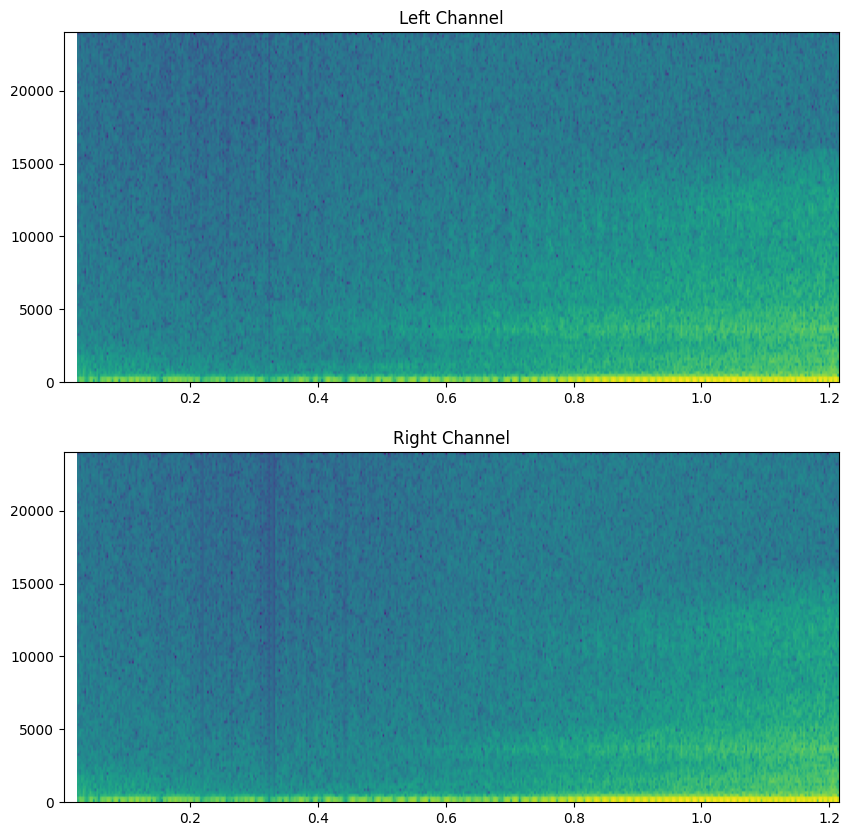

In [4]:
# plot the spectrogram of both channels
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.specgram(first_left[:,0], Fs=Fs1)
plt.title('Left Channel')
plt.subplot(2, 1, 2)
plt.specgram(first_right[:,1], Fs=Fs1)
plt.title('Right Channel')
plt.show()